# TelecomChurn Case Study 
### By Kush Naresh Lulla & Gautam Joshi
#### Main objective of this case study is to predict the churn of high value customers to take action and prevent churn 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import random
from IPython.display import display, Markdown, Latex

In [2]:
#getting the data 
churn_df=pd.read_csv("Data/train (1).csv")
test_df=pd.read_csv("Data/test (1).csv")

In [3]:
churn_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [4]:
test_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


In [5]:
churn_df.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [6]:
churn_df.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

In [7]:
def missing_run(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
    missing_value_df.sort_values('percent_missing', inplace=True, ascending= False)
    pd.set_option('display.max_rows', 200)
    return missing_value_df

In [8]:
missing_run(churn_df)

,column_name,percent_missing
arpu_3g_6,arpu_3g_6,74.902499
count_rech_2g_6,count_rech_2g_6,74.902499
night_pck_user_6,night_pck_user_6,74.902499
arpu_2g_6,arpu_2g_6,74.902499
date_of_last_rech_data_6,date_of_last_rech_data_6,74.902499
total_rech_data_6,total_rech_data_6,74.902499
av_rech_amt_data_6,av_rech_amt_data_6,74.902499
max_rech_data_6,max_rech_data_6,74.902499
count_rech_3g_6,count_rech_3g_6,74.902499
fb_user_6,fb_user_6,74.902499


In [9]:
missing_run(test_df)

,column_name,percent_missing
arpu_3g_6,arpu_3g_6,74.716667
count_rech_3g_6,count_rech_3g_6,74.716667
fb_user_6,fb_user_6,74.716667
night_pck_user_6,night_pck_user_6,74.716667
total_rech_data_6,total_rech_data_6,74.716667
max_rech_data_6,max_rech_data_6,74.716667
count_rech_2g_6,count_rech_2g_6,74.716667
date_of_last_rech_data_6,date_of_last_rech_data_6,74.716667
av_rech_amt_data_6,av_rech_amt_data_6,74.716667
arpu_2g_6,arpu_2g_6,74.716667


In [10]:
# we have a huge percent of missing value , we can see how we can fill or drop them
# Lets look at unique values to drop few columns as they dont add any data 
def unique_count(df):
    uni_count=pd.DataFrame(df.nunique(axis=0))
    return uni_count.sort_values(0)

In [11]:
uni_df=unique_count(churn_df)

In [12]:
# We can drop all the columns that have only one unique value
drop_list=list(uni_df[uni_df[0]==1].index)
# we can also drop the column that has only unique values that have no realtion to the customer behaviour 
drop_list.append('id')
drop_list

['std_ic_t2o_mou_6',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_ic_t2o_mou_8',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_6',
 'std_ic_t2o_mou_7',
 'id']

In [13]:
def drop_col(col_name):
    churn_df.drop(col_name,axis=1,inplace=True)
    test_df.drop(col_name,axis=1,inplace=True)
    return(col_name)

In [14]:
drop_col(drop_list)

['std_ic_t2o_mou_6',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_ic_t2o_mou_8',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_6',
 'std_ic_t2o_mou_7',
 'id']

In [15]:
unique_count(churn_df)

,0
churn_probability,2
night_pck_user_8,2
night_pck_user_7,2
night_pck_user_6,2
fb_user_7,2
fb_user_8,2
fb_user_6,2
monthly_2g_6,5
monthly_2g_7,6
monthly_2g_8,6


In [16]:
# Lets look at last rech day 
DateList=list(churn_df.select_dtypes(['object']).columns)
churn_df[DateList]

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014
...,...,...,...,...,...,...
69994,6/18/2014,7/31/2014,8/31/2014,NaN,7/31/2014,8/21/2014
69995,6/28/2014,7/31/2014,8/27/2014,NaN,NaN,NaN
69996,6/25/2014,7/30/2014,8/29/2014,NaN,NaN,NaN
69997,6/29/2014,7/19/2014,8/26/2014,6/17/2014,7/13/2014,8/14/2014


In [17]:
# We cans see that the null values mean that the person has not done a rechage in that month we can fill it with a indicator for null values 
def null_fill(col_name,fill_value):
    churn_df[col_name]=churn_df[col_name].fillna(fill_value)
    test_df[col_name]=test_df[col_name].fillna(fill_value)
    return (col_name,fill_value)

In [18]:
for c in DateList:
    print (c)

date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8


In [19]:
insert_values=[]
for c in DateList:
    insert_values.append(null_fill(c,-1))
insert_values

[('date_of_last_rech_6', -1),
 ('date_of_last_rech_7', -1),
 ('date_of_last_rech_8', -1),
 ('date_of_last_rech_data_6', -1),
 ('date_of_last_rech_data_7', -1),
 ('date_of_last_rech_data_8', -1)]

In [20]:
miss=missing_run(churn_df)
miss

,column_name,percent_missing
arpu_2g_6,arpu_2g_6,74.902499
arpu_3g_6,arpu_3g_6,74.902499
total_rech_data_6,total_rech_data_6,74.902499
night_pck_user_6,night_pck_user_6,74.902499
fb_user_6,fb_user_6,74.902499
av_rech_amt_data_6,av_rech_amt_data_6,74.902499
count_rech_3g_6,count_rech_3g_6,74.902499
count_rech_2g_6,count_rech_2g_6,74.902499
max_rech_data_6,max_rech_data_6,74.902499
max_rech_data_7,max_rech_data_7,74.478207


In [21]:
miss[miss.percent_missing>70]

,column_name,percent_missing
arpu_2g_6,arpu_2g_6,74.902499
arpu_3g_6,arpu_3g_6,74.902499
total_rech_data_6,total_rech_data_6,74.902499
night_pck_user_6,night_pck_user_6,74.902499
fb_user_6,fb_user_6,74.902499
av_rech_amt_data_6,av_rech_amt_data_6,74.902499
count_rech_3g_6,count_rech_3g_6,74.902499
count_rech_2g_6,count_rech_2g_6,74.902499
max_rech_data_6,max_rech_data_6,74.902499
max_rech_data_7,max_rech_data_7,74.478207


In [22]:
# All of these values are null as there is no or zero value to be filled so we can fill it with zero
zero_fill= miss[miss.percent_missing>70].index
for c in zero_fill:
    insert_values.append(null_fill(c,0))
insert_values

[('date_of_last_rech_6', -1),
 ('date_of_last_rech_7', -1),
 ('date_of_last_rech_8', -1),
 ('date_of_last_rech_data_6', -1),
 ('date_of_last_rech_data_7', -1),
 ('date_of_last_rech_data_8', -1),
 ('arpu_2g_6', 0),
 ('arpu_3g_6', 0),
 ('total_rech_data_6', 0),
 ('night_pck_user_6', 0),
 ('fb_user_6', 0),
 ('av_rech_amt_data_6', 0),
 ('count_rech_3g_6', 0),
 ('count_rech_2g_6', 0),
 ('max_rech_data_6', 0),
 ('max_rech_data_7', 0),
 ('arpu_3g_7', 0),
 ('fb_user_7', 0),
 ('count_rech_3g_7', 0),
 ('count_rech_2g_7', 0),
 ('av_rech_amt_data_7', 0),
 ('night_pck_user_7', 0),
 ('arpu_2g_7', 0),
 ('total_rech_data_7', 0),
 ('av_rech_amt_data_8', 0),
 ('night_pck_user_8', 0),
 ('arpu_2g_8', 0),
 ('arpu_3g_8', 0),
 ('fb_user_8', 0),
 ('count_rech_3g_8', 0),
 ('max_rech_data_8', 0),
 ('count_rech_2g_8', 0),
 ('total_rech_data_8', 0)]

In [23]:
miss=missing_run(churn_df)
miss[miss.percent_missing>0]

,column_name,percent_missing
loc_ic_t2m_mou_8,loc_ic_t2m_mou_8,5.290076
loc_og_t2t_mou_8,loc_og_t2t_mou_8,5.290076
std_og_t2m_mou_8,std_og_t2m_mou_8,5.290076
std_og_mou_8,std_og_mou_8,5.290076
std_og_t2t_mou_8,std_og_t2t_mou_8,5.290076
loc_ic_t2f_mou_8,loc_ic_t2f_mou_8,5.290076
loc_og_mou_8,loc_og_mou_8,5.290076
std_ic_mou_8,std_ic_mou_8,5.290076
loc_og_t2c_mou_8,loc_og_t2c_mou_8,5.290076
isd_og_mou_8,isd_og_mou_8,5.290076


In [24]:
# These columns can be filled with the median values of their columns respectively 
median_fill= miss[miss.percent_missing>0].index
for c in median_fill:
    insert_values.append(null_fill(c,churn_df[c].median()))
insert_values

[('date_of_last_rech_6', -1),
 ('date_of_last_rech_7', -1),
 ('date_of_last_rech_8', -1),
 ('date_of_last_rech_data_6', -1),
 ('date_of_last_rech_data_7', -1),
 ('date_of_last_rech_data_8', -1),
 ('arpu_2g_6', 0),
 ('arpu_3g_6', 0),
 ('total_rech_data_6', 0),
 ('night_pck_user_6', 0),
 ('fb_user_6', 0),
 ('av_rech_amt_data_6', 0),
 ('count_rech_3g_6', 0),
 ('count_rech_2g_6', 0),
 ('max_rech_data_6', 0),
 ('max_rech_data_7', 0),
 ('arpu_3g_7', 0),
 ('fb_user_7', 0),
 ('count_rech_3g_7', 0),
 ('count_rech_2g_7', 0),
 ('av_rech_amt_data_7', 0),
 ('night_pck_user_7', 0),
 ('arpu_2g_7', 0),
 ('total_rech_data_7', 0),
 ('av_rech_amt_data_8', 0),
 ('night_pck_user_8', 0),
 ('arpu_2g_8', 0),
 ('arpu_3g_8', 0),
 ('fb_user_8', 0),
 ('count_rech_3g_8', 0),
 ('max_rech_data_8', 0),
 ('count_rech_2g_8', 0),
 ('total_rech_data_8', 0),
 ('loc_ic_t2m_mou_8', 58.21),
 ('loc_og_t2t_mou_8', 11.74),
 ('std_og_t2m_mou_8', 3.3),
 ('std_og_mou_8', 10.504999999999999),
 ('std_og_t2t_mou_8', 0.0),
 ('loc_ic_t

In [25]:
miss=missing_run(churn_df)
miss[miss.percent_missing>0]

,column_name,percent_missing


In [26]:
# Now we have no null values 
# we can fix the date valriables and convert them into useale data 
DateList

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [27]:
def str2day(init):
    if len(str(init))>2:
        r=init.split("/")
        x=int(r[1])
    else:
        x=int(init)
    return x
def FixDate(col):
    churn_df[col]=churn_df[col].apply(str2day)
    test_df[col]=test_df[col].apply(str2day)
    return 'Done '+ col

In [28]:
for x in DateList:
    FixDate(x)

In [29]:
test_df[DateList]

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,21,26,24,-1,-1,-1
1,19,16,24,-1,-1,-1
2,29,27,28,-1,-1,-1
3,25,30,24,-1,-1,-1
4,29,29,30,-1,-1,-1
...,...,...,...,...,...,...
29995,27,27,29,19,-1,-1
29996,18,24,29,-1,10,-1
29997,22,10,30,-1,-1,-1
29998,30,18,31,-1,-1,-1


In [30]:
# Lest Check all the columns and their data types 
churn_df.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 158 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    arpu_6                    69999 non-null  float64
 1    arpu_7                    69999 non-null  float64
 2    arpu_8                    69999 non-null  float64
 3    onnet_mou_6               69999 non-null  float64
 4    onnet_mou_7               69999 non-null  float64
 5    onnet_mou_8               69999 non-null  float64
 6    offnet_mou_6              69999 non-null  float64
 7    offnet_mou_7              69999 non-null  float64
 8    offnet_mou_8              69999 non-null  float64
 9    roam_ic_mou_6             69999 non-null  float64
 10   roam_ic_mou_7             69999 non-null  float64
 11   roam_ic_mou_8             69999 non-null  float64
 12   roam_og_mou_6             69999 non-null  float64
 13   roam_og_mou_7             69999 non-null  fl

## After a bit of research online we find that the normal protocol is to split the data into good phase action phase and churn phase since we do not have a churn phase and are only using churn probabilty we assume that 6,7 is the good phase and 8 is the action phase and 9th month that is the month we are in now is the churn phase for the customers that are predicted to churn

In [31]:
# We need to devide the data into regular or good phase and action phase
# Good phase will be the 6,7th month and action phase will be the 8th month
# lets get the create fetures of the same
def avg_feat (col1,col2,new_name):
    churn_df[new_name]=(churn_df[col1]+churn_df[col2])/2
    test_df[new_name]=(test_df[col1]+test_df[col2])/2
    return (col1,col2,new_name)


In [32]:
cols_6=churn_df.columns[churn_df.columns.str.contains('_6')]
cols_7=churn_df.columns[churn_df.columns.str.contains('_7')]
new_name_cols=[]
for x in cols_6:
    
    new_name_cols.append("Good_"+x[:-2])
new_name_cols

['Good_arpu',
 'Good_onnet_mou',
 'Good_offnet_mou',
 'Good_roam_ic_mou',
 'Good_roam_og_mou',
 'Good_loc_og_t2t_mou',
 'Good_loc_og_t2m_mou',
 'Good_loc_og_t2f_mou',
 'Good_loc_og_t2c_mou',
 'Good_loc_og_mou',
 'Good_std_og_t2t_mou',
 'Good_std_og_t2m_mou',
 'Good_std_og_t2f_mou',
 'Good_std_og_mou',
 'Good_isd_og_mou',
 'Good_spl_og_mou',
 'Good_og_others',
 'Good_total_og_mou',
 'Good_loc_ic_t2t_mou',
 'Good_loc_ic_t2m_mou',
 'Good_loc_ic_t2f_mou',
 'Good_loc_ic_mou',
 'Good_std_ic_t2t_mou',
 'Good_std_ic_t2m_mou',
 'Good_std_ic_t2f_mou',
 'Good_std_ic_mou',
 'Good_total_ic_mou',
 'Good_spl_ic_mou',
 'Good_isd_ic_mou',
 'Good_ic_others',
 'Good_total_rech_num',
 'Good_total_rech_amt',
 'Good_max_rech_amt',
 'Good_date_of_last_rech',
 'Good_last_day_rch_amt',
 'Good_date_of_last_rech_data',
 'Good_total_rech_data',
 'Good_max_rech_data',
 'Good_count_rech_2g',
 'Good_count_rech_3g',
 'Good_av_rech_amt_data',
 'Good_vol_2g_mb',
 'Good_vol_3g_mb',
 'Good_arpu_3g',
 'Good_arpu_2g',
 'Go

In [33]:
new_cols=list(zip(cols_6,cols_7,new_name_cols))
new_cols

[('arpu_6', 'arpu_7', 'Good_arpu'),
 ('onnet_mou_6', 'onnet_mou_7', 'Good_onnet_mou'),
 ('offnet_mou_6', 'offnet_mou_7', 'Good_offnet_mou'),
 ('roam_ic_mou_6', 'roam_ic_mou_7', 'Good_roam_ic_mou'),
 ('roam_og_mou_6', 'roam_og_mou_7', 'Good_roam_og_mou'),
 ('loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'Good_loc_og_t2t_mou'),
 ('loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'Good_loc_og_t2m_mou'),
 ('loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'Good_loc_og_t2f_mou'),
 ('loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'Good_loc_og_t2c_mou'),
 ('loc_og_mou_6', 'loc_og_mou_7', 'Good_loc_og_mou'),
 ('std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'Good_std_og_t2t_mou'),
 ('std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'Good_std_og_t2m_mou'),
 ('std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'Good_std_og_t2f_mou'),
 ('std_og_mou_6', 'std_og_mou_7', 'Good_std_og_mou'),
 ('isd_og_mou_6', 'isd_og_mou_7', 'Good_isd_og_mou'),
 ('spl_og_mou_6', 'spl_og_mou_7', 'Good_spl_og_mou'),
 ('og_others_6', 'og_others_7', 'Good_og_others'),
 ('total_og_mou_

In [34]:
check=[]
for c in new_cols:
    check.append(avg_feat(c[0],c[1],c[2]))
check

[('arpu_6', 'arpu_7', 'Good_arpu'),
 ('onnet_mou_6', 'onnet_mou_7', 'Good_onnet_mou'),
 ('offnet_mou_6', 'offnet_mou_7', 'Good_offnet_mou'),
 ('roam_ic_mou_6', 'roam_ic_mou_7', 'Good_roam_ic_mou'),
 ('roam_og_mou_6', 'roam_og_mou_7', 'Good_roam_og_mou'),
 ('loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'Good_loc_og_t2t_mou'),
 ('loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'Good_loc_og_t2m_mou'),
 ('loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'Good_loc_og_t2f_mou'),
 ('loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'Good_loc_og_t2c_mou'),
 ('loc_og_mou_6', 'loc_og_mou_7', 'Good_loc_og_mou'),
 ('std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'Good_std_og_t2t_mou'),
 ('std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'Good_std_og_t2m_mou'),
 ('std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'Good_std_og_t2f_mou'),
 ('std_og_mou_6', 'std_og_mou_7', 'Good_std_og_mou'),
 ('isd_og_mou_6', 'isd_og_mou_7', 'Good_isd_og_mou'),
 ('spl_og_mou_6', 'spl_og_mou_7', 'Good_spl_og_mou'),
 ('og_others_6', 'og_others_7', 'Good_og_others'),
 ('total_og_mou_

In [35]:
# We can find the total revenue generated by getting the avg monthly recharge and multiplying it with the number of months user has been on the network 
churn_df['av_total_rech']=(churn_df.av_rech_amt_data_6+churn_df.av_rech_amt_data_7+churn_df.av_rech_amt_data_8)/3
churn_df['Total_rech']=churn_df.av_total_rech*(churn_df.aon/30)
test_df['av_total_rech']=(test_df.av_rech_amt_data_6+test_df.av_rech_amt_data_7+test_df.av_rech_amt_data_8)/3
test_df['Total_rech']=test_df.av_total_rech*(test_df.aon/30)

In [36]:
for c in new_cols:
    drop_list.append(drop_col(c[0]))
    drop_list.append(drop_col(c[1]))
drop_list[-1*len(new_cols):]

['std_ic_mou_7',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'ic_others_6',
 'ic_others_7',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'total_rech_data_6',
 'total_rech_data_7',
 'max_rech_data_6',
 'max_rech_data_7',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_2g_6',
 'arpu_2g_7',
 'night_pck_user_6',
 'night_pck_user_7',
 'monthly_2g_6',
 'monthly_2g_7',
 'sachet_2g_6',
 'sachet_2g_7',
 'monthly_3g_6',
 'monthly_3g_7',
 'sachet_3g_6',
 'sachet_3g_7',
 'fb_user_6',
 'fb_user_7']

In [37]:
churn_df.shape

(69999, 109)

In [38]:
avg_feat('jul_vbc_3g','jun_vbc_3g','Good_vbc_3g')

('jul_vbc_3g', 'jun_vbc_3g', 'Good_vbc_3g')

In [39]:
drop_col('jun_vbc_3g')
drop_col('jul_vbc_3g')

'jul_vbc_3g'

### All good months data avg done and features created and redundant data dropped 

In [40]:
churn_df.shape

(69999, 108)

In [41]:
# Age on network looks like its important lets look at the values
churn_df.aon.describe([0,0.2,0.4,0.6,0.8,1])

count    69999.000000
mean      1220.639709
std        952.426321
min        180.000000
0%         180.000000
20%        401.000000
40%        669.000000
50%        868.000000
60%       1126.000000
80%       2239.400000
100%      4337.000000
max       4337.000000
Name: aon, dtype: float64

In [42]:
#Lets bin the data in 5 bins
def age_bin(num):
    if num<401:
        return 1
    elif num <669:
        return 2
    elif num <1126:
        return 3
    elif num < 2239:
        return 4
    else :
        return 5


In [43]:
churn_df['Age_bin']=churn_df.aon.apply(age_bin)
test_df['Age_bin']=churn_df.aon.apply(age_bin)


In [44]:
churn_df.Age_bin.describe([0,0.2,0.4,0.6,0.8,1])

count    69999.000000
mean         3.001071
std          1.414269
min          1.000000
0%           1.000000
20%          2.000000
40%          3.000000
50%          3.000000
60%          4.000000
80%          5.000000
100%         5.000000
max          5.000000
Name: Age_bin, dtype: float64

### Lets find the high value customers 

In [45]:
highval_cutoff=churn_df.Good_arpu.quantile(0.7)
highval_cutoff

317.491

In [46]:
cutoff2=churn_df.Good_arpu.quantile(0.99)# Dropping off top 1% outliers 
cutoff2

1342.9106400000005

In [47]:
highval_df=churn_df[(churn_df.Good_arpu>=highval_cutoff)&(churn_df.Good_arpu<=cutoff2)].copy()
highval_df

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,...,Good_night_pck_user,Good_monthly_2g,Good_sachet_2g,Good_monthly_3g,Good_sachet_3g,Good_fb_user,av_total_rech,Total_rech,Good_vbc_3g,Age_bin
12,392.024,42.98,644.43,0.0,0.0,3.98,51.24,0.00,0.00,55.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,1
15,338.286,194.43,197.09,0.0,0.0,194.43,185.88,4.94,0.00,385.26,...,0.0,0.5,0.0,0.0,0.0,0.5,102.666667,2060.177778,0.000,2
23,479.762,0.89,386.91,0.0,0.0,0.89,378.01,8.88,0.00,387.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,2
24,240.449,29.86,222.03,0.0,0.0,29.86,99.86,0.00,0.36,129.73,...,0.0,0.0,1.5,0.0,0.0,0.0,30.666667,1246.088889,0.000,4
25,689.603,197.54,556.61,0.0,0.0,81.86,229.68,0.36,7.01,311.91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69973,767.800,456.46,1191.86,0.0,0.0,145.23,295.39,25.08,0.00,465.71,...,0.0,0.0,1.0,0.0,1.0,1.0,405.333333,11146.666667,179.435,3
69974,90.317,110.46,33.01,0.0,0.0,4.78,33.01,0.00,0.00,37.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,2
69980,220.884,68.99,173.19,0.0,0.0,68.99,171.86,0.03,0.00,240.89,...,1.0,0.0,2.0,1.5,0.0,1.0,161.666667,4165.611111,194.430,3
69981,252.875,380.99,718.61,0.0,0.0,377.14,679.89,13.89,0.00,1070.94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,5


In [48]:
highval_df=highval_df.reset_index(drop=True)
highval_df

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,...,Good_night_pck_user,Good_monthly_2g,Good_sachet_2g,Good_monthly_3g,Good_sachet_3g,Good_fb_user,av_total_rech,Total_rech,Good_vbc_3g,Age_bin
0,392.024,42.98,644.43,0.0,0.0,3.98,51.24,0.00,0.00,55.23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,1
1,338.286,194.43,197.09,0.0,0.0,194.43,185.88,4.94,0.00,385.26,...,0.0,0.5,0.0,0.0,0.0,0.5,102.666667,2060.177778,0.000,2
2,479.762,0.89,386.91,0.0,0.0,0.89,378.01,8.88,0.00,387.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,2
3,240.449,29.86,222.03,0.0,0.0,29.86,99.86,0.00,0.36,129.73,...,0.0,0.0,1.5,0.0,0.0,0.0,30.666667,1246.088889,0.000,4
4,689.603,197.54,556.61,0.0,0.0,81.86,229.68,0.36,7.01,311.91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20295,767.800,456.46,1191.86,0.0,0.0,145.23,295.39,25.08,0.00,465.71,...,0.0,0.0,1.0,0.0,1.0,1.0,405.333333,11146.666667,179.435,3
20296,90.317,110.46,33.01,0.0,0.0,4.78,33.01,0.00,0.00,37.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,2
20297,220.884,68.99,173.19,0.0,0.0,68.99,171.86,0.03,0.00,240.89,...,1.0,0.0,2.0,1.5,0.0,1.0,161.666667,4165.611111,194.430,3
20298,252.875,380.99,718.61,0.0,0.0,377.14,679.89,13.89,0.00,1070.94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,5


In [49]:
highval_df.describe()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,...,Good_night_pck_user,Good_monthly_2g,Good_sachet_2g,Good_monthly_3g,Good_sachet_3g,Good_fb_user,av_total_rech,Total_rech,Good_vbc_3g,Age_bin
count,20300.000000,20300.000000,20300.000000,20300.000000,20300.000000,20300.000000,20300.000000,20300.000000,20300.000000,20300.000000,...,20300.000000,20300.000000,20300.000000,20300.000000,20300.000000,20300.000000,20300.000000,20300.000000,20300.000000,20300.000000
mean,492.860731,253.178810,356.072907,12.031181,18.039991,82.169397,160.718443,6.149662,1.683536,249.434933,...,0.009877,0.129655,0.541207,0.160197,0.141527,0.340123,86.786321,3761.415301,118.169991,3.069901
std,338.828649,423.641145,425.528739,72.581804,85.502038,205.062024,214.104198,18.203693,7.482825,328.263976,...,0.084450,0.337833,1.670633,0.469003,0.799585,0.437360,146.883940,7990.330148,327.032458,1.416820
min,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,281.769000,32.100000,91.800000,0.000000,0.000000,7.355000,27.775000,0.000000,0.000000,46.240000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,441.649000,95.460000,234.010000,0.000000,0.000000,27.060000,87.030000,0.040000,0.000000,142.445000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.666667,130.369444,0.000000,3.000000
75%,642.527500,280.265000,462.217500,0.000000,0.000000,81.552500,218.417500,4.430000,0.010000,337.507500,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,138.666667,3691.166667,21.310000,4.000000
max,5748.252000,6767.680000,14007.340000,4169.810000,3493.360000,5263.860000,4524.590000,588.290000,351.830000,5263.860000,...,1.000000,4.500000,38.000000,8.000000,25.000000,1.000000,2123.333333,127486.955556,6422.830000,5.000000


In [50]:
churn_per=(len(highval_df[highval_df.churn_probability==1])/len(highval_df))
round(churn_per*100,2)

8.94

### 9% Of high value customers are expected to churn


In [51]:
uni_df=unique_count(churn_df)
uni_df

,0
churn_probability,2
fb_user_8,2
night_pck_user_8,2
Good_fb_user,3
Good_night_pck_user,3
Age_bin,5
monthly_2g_8,6
Good_monthly_2g,8
monthly_3g_8,12
Good_monthly_3g,18


In [52]:
uni_count=pd.DataFrame(highval_df.nunique(axis=0))
catcols=list(uni_count[uni_count[0]<6].index)
catcols

['night_pck_user_8',
 'fb_user_8',
 'churn_probability',
 'Good_night_pck_user',
 'Good_fb_user',
 'Age_bin']

In [53]:
num_cols=list(uni_count[uni_count[0]>5].index)
num_cols

['arpu_8',
 'onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'max_rech_amt_8',
 'date_of_last_rech_8',
 'last_day_rch_amt_8',
 'date_of_last_rech_data_8',
 'total_rech_data_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'av_rech_amt_data_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'arpu_3g_8',
 'arpu_2g_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'aon',
 'aug_vbc_3g',
 'Good_arpu',
 'Good_onnet_mou',
 'Good_offnet_mou

# EDA 
### Lest look at the data visually and see if we can find any strong relations 

#### We can focus on the high value customers

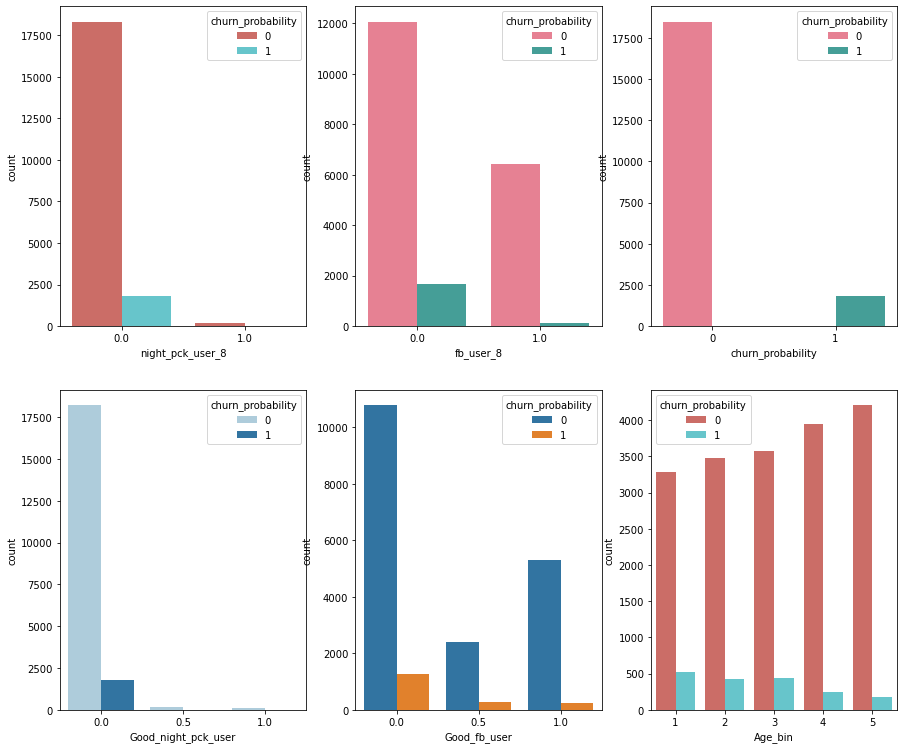

In [54]:
plt.figure(figsize=(15, 20))
r=1
pal=["tab10","hls","husl","Set2","Paired","flare","rocket","cubehelix","hls","husl"]
for c in catcols:
    plt.subplot(3,3,r)
    sns.countplot(data=highval_df,x=c,hue='churn_probability',palette=random.choice(pal))
    r=r+1
plt.show()

### Observations
* Customers who have stayed longer with the network tend to churn less
* customers who have used social media atlest once tend to churn less
* Customers who use do not use the night pack have a higher chance of churning

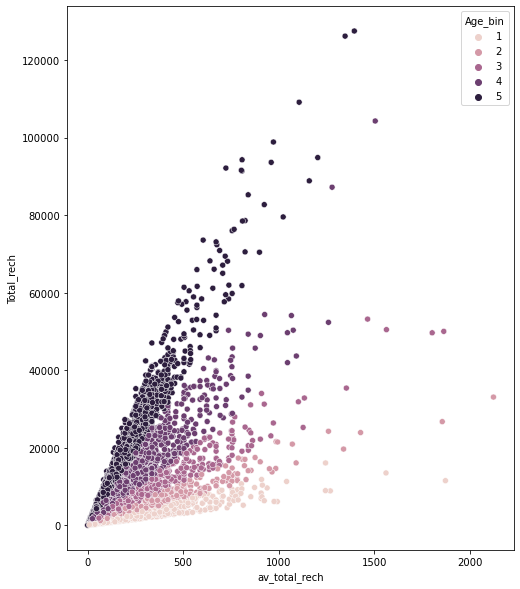

In [55]:
#Lets see our Revenue vs age on network as this is one of the most important factors visible in graphs
plt.figure(figsize=(8,10))
sns.scatterplot(data=highval_df,x='av_total_rech',y='Total_rech',hue='Age_bin')
plt.show()

### Older Customers tend to generate higher cashflow 
#### Lets look at calling data

<AxesSubplot:xlabel='churn_probability', ylabel='Good_std_og_t2t_mou'>

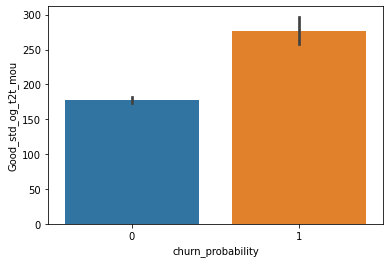

In [56]:
sns.barplot(data=highval_df,x="churn_probability",y="Good_std_og_t2t_mou")

<AxesSubplot:xlabel='churn_probability', ylabel='Good_roam_og_mou'>

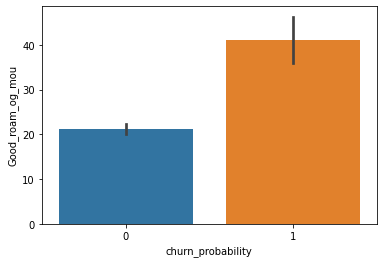

In [57]:
sns.barplot(data=highval_df,x="churn_probability",y="Good_roam_og_mou")

<AxesSubplot:xlabel='churn_probability', ylabel='Good_isd_og_mou'>

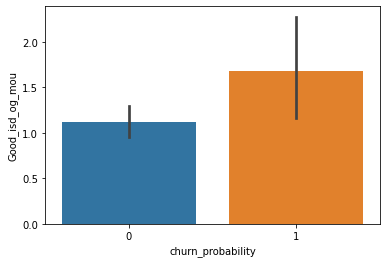

In [58]:
sns.barplot(data=highval_df,x="churn_probability",y="Good_isd_og_mou")

<AxesSubplot:xlabel='churn_probability', ylabel='Good_monthly_3g'>

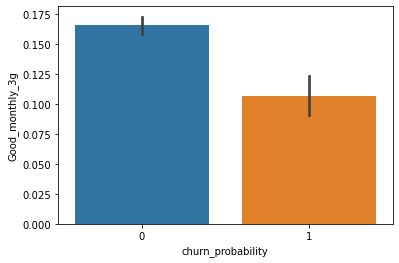

In [59]:
sns.barplot(data=highval_df,x="churn_probability",y="Good_monthly_3g")

<AxesSubplot:xlabel='churn_probability', ylabel='Good_monthly_2g'>

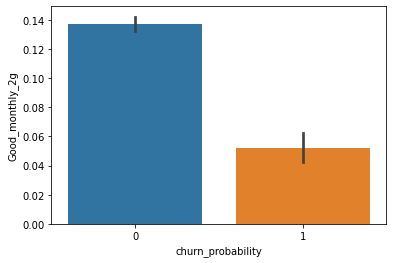

In [60]:
sns.barplot(data=highval_df,x="churn_probability",y="Good_monthly_2g")

## Observation
* Calling Rates seem to be a major cause of churn as people who have a high probabilty of churn tend to have high out going calls
* Data prices seem to be fine as the churn users dont really use data as much

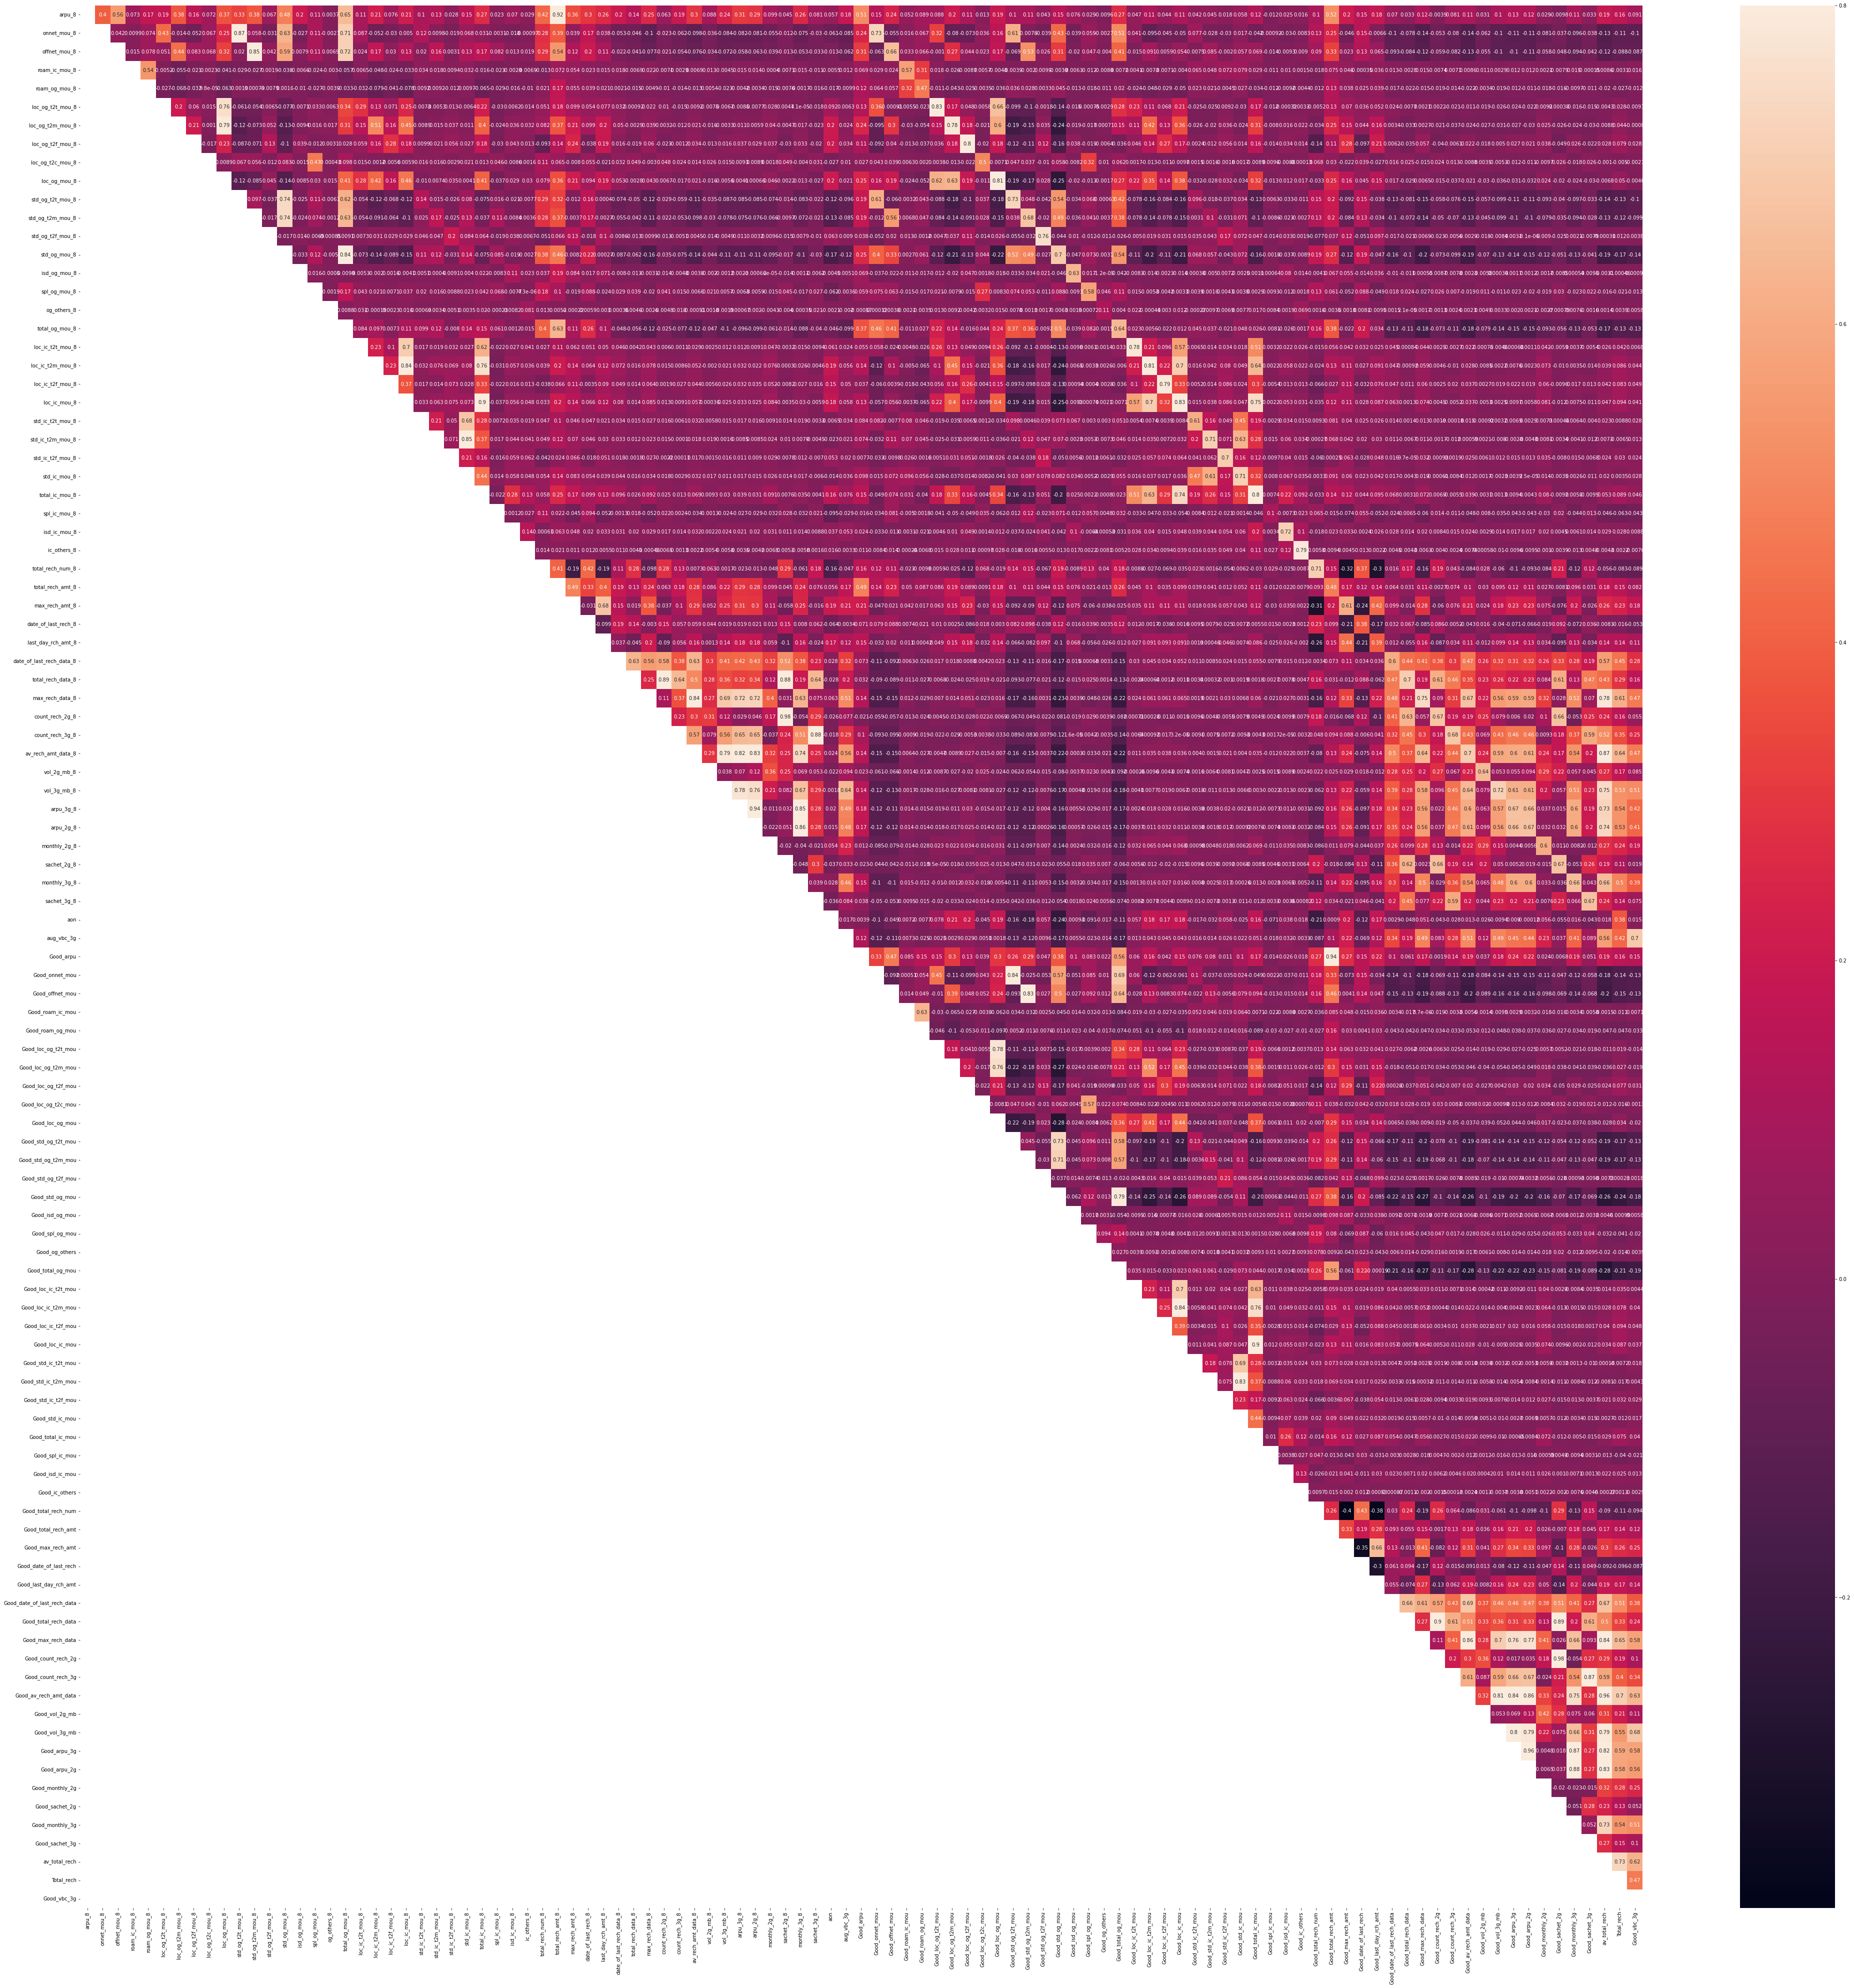

In [61]:
plt.figure(figsize=(70,70))
corr_matrix=highval_df[num_cols].corr()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))# since we have a lot columns heatmaps take a long time to render
sns.heatmap(upper_tri,annot=True,vmax=0.8)
plt.show()

## We see that there are hightly co-related values in the data with some values going much higer than 0.9 . we will loose these while we build models that are automated , we will also need PCA to reduce the total number of features 

### Now we need to balance the data as there are only 9% data is churn data and we need to balance the data 

In [62]:
import imblearn 
y=highval_df['churn_probability']
X=highval_df.drop('churn_probability',axis=1)

In [63]:
oversample= imblearn.over_sampling.SMOTE()

In [64]:
X,y=oversample.fit_resample(X,y)

In [65]:
from collections import Counter
counter= Counter(y)
print(counter)

Counter({0: 18485, 1: 18485})


# Now are data is 50% - 0 and 50% -1 

In [66]:
# importing important libs for ML
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_fin_test=scaler.transform(test_df)

In [68]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [69]:
display(Markdown("#### Train Data shape:"+str(x_train.shape)))
display(Markdown("#### Test Data shape:"+str(x_test.shape)))
display(Markdown("#### Final Test Data shape:"+str(X_fin_test.shape)))

#### Train Data shape:(27727, 108)

#### Test Data shape:(9243, 108)

#### Final Test Data shape:(30000, 108)

## Applying PCA On the data

In [70]:
pca = PCA(random_state=100)
pca.fit(x_train)

PCA(random_state=100)

In [71]:
pca.components_

array([[ 1.02082001e-01, -1.07114589e-02,  1.96610723e-02, ...,
         1.86591374e-01,  1.54192030e-01,  4.98215440e-02],
       [ 2.07364290e-01,  1.50125830e-01,  1.92775475e-01, ...,
        -3.37212107e-02, -6.07498339e-02,  6.83634630e-02],
       [-1.32188424e-01, -1.74954475e-01, -1.05278050e-01, ...,
         2.09202809e-03, -4.20992563e-03,  1.08402676e-01],
       ...,
       [-0.00000000e+00,  9.14137270e-15,  7.04620189e-15, ...,
        -1.18527668e-16, -2.81044410e-18, -4.32622970e-17],
       [ 0.00000000e+00,  3.65796421e-15,  8.86757694e-17, ...,
        -2.60892839e-17,  8.59836287e-18, -8.47443058e-17],
       [-0.00000000e+00, -4.37886616e-15, -1.89447430e-15, ...,
        -1.39222455e-16, -2.78092101e-17, -1.70438590e-17]])

In [72]:
pca.explained_variance_ratio_

array([1.49243381e-01, 8.86501841e-02, 6.68411490e-02, 5.20647680e-02,
       3.62702519e-02, 3.23459665e-02, 2.92260710e-02, 2.66230260e-02,
       2.50902682e-02, 2.24831523e-02, 2.10614879e-02, 2.08399137e-02,
       2.03390830e-02, 1.97407489e-02, 1.74352452e-02, 1.68785528e-02,
       1.55784745e-02, 1.55047392e-02, 1.49672161e-02, 1.45276147e-02,
       1.28175537e-02, 1.26652930e-02, 1.16885159e-02, 1.13435065e-02,
       1.09712398e-02, 1.08127622e-02, 1.06935960e-02, 1.04288710e-02,
       1.00121833e-02, 9.77688633e-03, 9.05921476e-03, 8.21955286e-03,
       7.80541981e-03, 7.51992759e-03, 7.22606090e-03, 6.94104473e-03,
       6.76097934e-03, 6.68313344e-03, 6.47037426e-03, 6.30678596e-03,
       5.98289774e-03, 5.87815634e-03, 5.39569362e-03, 5.02943765e-03,
       4.71792032e-03, 4.68382619e-03, 4.60583259e-03, 4.41412277e-03,
       3.98128419e-03, 3.70218784e-03, 3.62818488e-03, 3.42857806e-03,
       3.28365594e-03, 3.19324662e-03, 3.09182184e-03, 2.93894434e-03,
      

<BarContainer object of 108 artists>

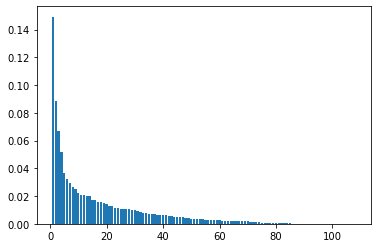

In [73]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [74]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu[53]# Gives us 95% variance 

0.9518392204274482

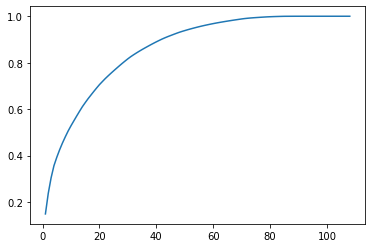

In [75]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

In [76]:
pc2 = PCA(n_components=54, random_state=100)

In [77]:
x_train_pca=pc2.fit_transform(x_train)

In [78]:
x_train_pca.shape

(27727, 54)

In [79]:
# Lets look at the data we have 
name=[]
for x in range (1,55):
    name.append("PC"+str(x))
df = pd.DataFrame(x_train_pca, columns=name)
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54
0,16.875346,2.385009,0.847611,-5.867955,-0.933948,4.201047,-0.601577,-0.154343,-1.044592,1.437824,...,0.865741,-0.585132,-0.151103,-0.233279,0.346465,0.218989,-1.589367,-0.636473,0.598525,-0.873779
1,10.092937,1.160348,0.260394,0.879031,0.066595,1.824797,-0.114625,-1.069186,-2.152913,0.668675,...,-0.586167,-0.289067,1.936172,0.119723,0.185427,0.341576,-0.550318,0.044658,1.118314,-1.458069
2,9.054601,-5.739159,0.132110,-4.435021,-0.462254,0.054798,0.290977,0.612134,-0.841817,-0.161998,...,-0.141813,0.328205,0.429975,0.554279,0.166801,0.150630,-0.740385,1.330745,0.349513,0.369755
3,-1.191747,-3.337310,1.299926,0.894628,1.229356,0.597486,0.201724,-0.496133,-0.372343,-0.519892,...,-0.312592,0.014381,0.280307,-0.214460,0.444134,-0.085678,-0.035210,-0.156607,0.324372,-0.075598
4,-0.273723,-3.475305,1.343078,-0.534644,-0.144403,0.810958,-0.132191,-0.222525,0.939617,-1.521577,...,0.149571,-0.144500,-0.208321,0.695301,-0.140691,-0.508540,0.362212,-0.124314,1.125439,0.109399


In [80]:
x_test_pca=pc2.transform(x_test)
x_test_pca.shape

(9243, 54)

In [82]:
x_fin_test_pca=pc2.transform(X_fin_test)